In [1]:
from becpy.functions import g32, _g32
from scipy.optimize import brentq
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from ipywidgets.widgets import interact

In [3]:
z32 = _g32(1)

In [4]:
import mpmath as mp

In [13]:
def _fun(y, eta, nu, alpha):
    ret =  y - _g32(np.exp(eta * (nu - 2*alpha*y)))
    return ret
# #     print(type(ret))
#     if isinstance(ret, np.complex):
#         if np.isclose(float(ret.imag), 0):
#             return float(ret.real)
#     elif isinstance(ret, np.float) and ret > 0:
#         return ret
#     else:
#         return np.nan

In [14]:
def solver(nu, alpha):
    a1 = nu/(2*alpha)
    a2 = (nu+1)/(2*alpha+1)
    eta = np.sign(z32 - a1)
    if eta == 0:
        return (z32, 0.)
    elif eta > 0:
        a = max(0, a1, a2)
        xt = brentq(_fun, a, z32, args=(eta, nu, alpha))
        return (xt, 0)
    else:
        xt = brentq(_fun, 0, 1, args=(eta, nu, alpha))
        x0 = nu/alpha - 2*xt
        return (xt, x0)

In [7]:
nu = 3
alpha = 1.3

t = np.linspace(0, 1, int(1e4))

y = g32(t)

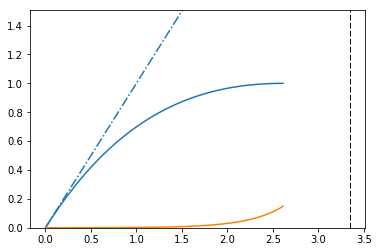

In [12]:
plt.figure(figsize=(9,6))

def plot(nu):
    
    a1 = nu/(2*alpha)
    a2 = (nu+1)/(2*alpha+1)
    eta = np.sign(z32 - a1)

    plt.plot(y, t,)
#     plt.set_ylim(*plt.get_ylim())
    plt.ylim(0, 1.505)

    plt.plot(y, y, 'C0-.')

    plt.plot(y, np.exp(eta * (nu - 2*alpha*y)))
    plt.plot(y, eta*(nu - 2*alpha*y) +1, 'C1-.')

    y_star = (nu+1)/(2*alpha+1)
    plt.plot(y_star, y_star, 'o', mfc='none', mec='r')

    plt.axvline(nu/(2*alpha), color='k', linestyle='--', linewidth=1)
    
    plt.show()

interact(plot, nu=(-10, 10, 0.1))

# n(mu)

In [17]:
nus = np.arange(-10, 10, .1)
x_t = np.empty(nus.shape)
x_c = np.empty(nus.shape)


for j, nu in enumerate(nus):
#     print(nu)
    x_t[j], x_c[j] = solver(nu, alpha)


plt.plot(nus, x_t)
plt.plot(nus, x_c)

TypeError: can't convert complex to float

## Potenziale armonico

In [16]:
r = np.linspace(0, 1, 200)
nus = 8 - 8*r**2
x_t = np.empty(nus.shape)
x_c = np.empty(nus.shape)


for j, nu in enumerate(nus):
    x_t[j], x_c[j] = solver(nu, alpha)



plt.plot(r, x_c)
plt.plot(r, x_t)

TypeError: can't convert complex to float